In [1]:
class Params:
    def __init__(self):
        # self.data_dir='./datacache/fingerprint/fingerprint.csv'
        # self.testdata_dir='./datacache/0testdata/fingerprint/fingerprint.csv'
        
        self.data_dir='./output/fingerprint_train.csv'
        self.testdata_dir='./output/fingerprint_test.csv'
        
        self.dataset_for_train_test='./datacache/train&test'
        # self.model_type = "RandomForest"
        # self.n_estimators = 100
        # self.max_depth = None
        # self.learning_rate = 0.1
        # self.epochs = 10
        # self.batch_size = 32
p = Params()

In [2]:
import os
import pandas as pd
import numpy as np
from functions import haversine_distance

前三列的描述性统计信息：
          Latitude   Longitude    floor ID
count  762.000000  762.000000  762.000000
mean    49.461161   11.111072   -1.196850
std      0.000117    0.000351    0.970303
min     49.460900   11.110472   -2.000000
25%     49.461074   11.110804   -2.000000
50%     49.461176   11.111027   -2.000000
75%     49.461257   11.111337    0.000000
max     49.461330   11.111855    0.000000


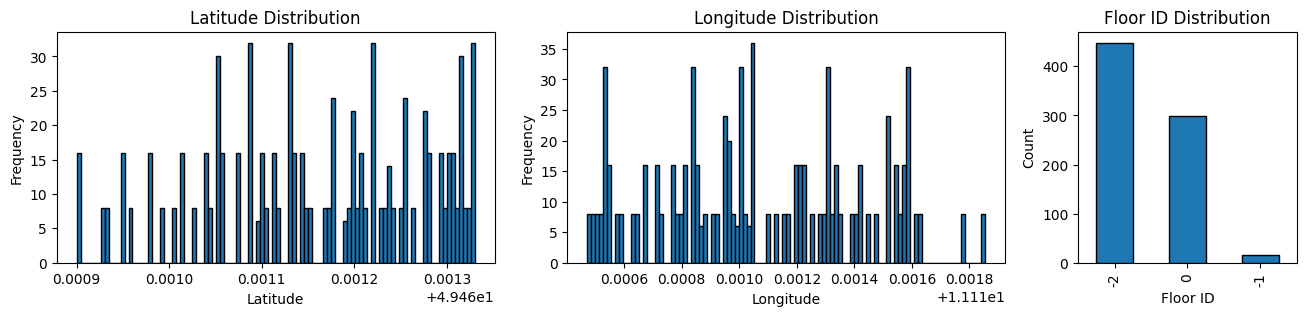

<Figure size 640x480 with 0 Axes>

In [5]:
# train指纹库数据读取和可视化
df = pd.read_csv(p.data_dir)
print("datasets shape:",df.shape)
# # 查看基础统计信息
# desc_stats = df[0:2].describe()#只看前三行
# print("Descriptive Statistics:\n", desc_stats)
# 仅统计前三列的描述性统计信息
desc_stats = df[['Latitude',  'Longitude', 'floor ID']].describe()
print("前三列的描述性统计信息：\n", desc_stats)

# # 检查缺失值
# missing_values_count = (df == -100).sum()
# print("\nMissing Values Count:\n", missing_values_count)
# # 保存全是缺失值的列
# all_missing_cols = missing_values_count[missing_values_count == len(df)].index


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(16, 3))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 3, 1.5])

# plt.subplot(1, 3, 1)
ax1 = plt.subplot(gs[0])
plt.hist(df['Latitude'], bins=100, edgecolor='black')
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

# plt.subplot(1, 3, 2)
ax1 = plt.subplot(gs[1])
plt.hist(df['Longitude'], bins=100, edgecolor='black')
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

# plt.subplot(1, 3, 3)
ax1 = plt.subplot(gs[2])
df['floor ID'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Floor ID Distribution')
plt.xlabel('Floor ID')
plt.ylabel('Count')
plt.show()

plt.tight_layout()
plt.show()

datasets shape: (112, 247)


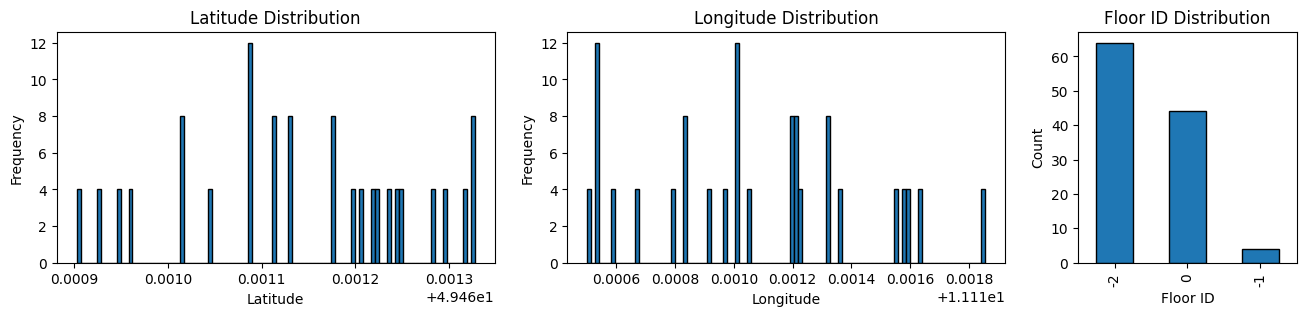

<Figure size 640x480 with 0 Axes>

In [7]:
# test指纹库数据读取和可视化
# 指纹库数据读取和可视化

df = pd.read_csv(p.testdata_dir)
print("datasets shape:",df.shape)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16, 3))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 3, 1.5])
# plt.subplot(1, 3, 1)
ax1 = plt.subplot(gs[0])
plt.hist(df['Latitude'], bins=100, edgecolor='black')
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
# plt.subplot(1, 3, 2)
ax1 = plt.subplot(gs[1])
plt.hist(df['Longitude'], bins=100, edgecolor='black')
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
# plt.subplot(1, 3, 3)
ax1 = plt.subplot(gs[2])
df['floor ID'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Floor ID Distribution')
plt.xlabel('Floor ID')
plt.ylabel('Count')
plt.show()
plt.tight_layout()
plt.show()


In [3]:
# 数据读取 注意是否要drop全是缺失值的列！！！
df1 = pd.read_csv(p.data_dir)
print("dataset 1 shape:",df1.shape)
df2 = pd.read_csv(p.testdata_dir)
print("dataset 2 shape:",df2.shape)
df=df1

#时间差分析
stats = df1['与这一批WIFI数据的时间差(s)'].describe()
print(stats)

# # 合并train和test的数据集
# df_merged_train_test=pd.concat([df1,df2], ignore_index=True) #ignore_index=True重置索引
# print("merged dataset shape:",df_merged_train_test.shape)
# df=df1
# print(df.head(3))

# df_drop_missing_columns=df.drop(common_missing_cols, axis=1, inplace=False)         #drop#################
# print("dataset shape after drop:",df_drop_missing_columns.shape)

dataset 1 shape: (762, 247)
dataset 2 shape: (112, 247)
count    762.000000
mean       0.783785
std        0.531370
min        0.001200
25%        0.338675
50%        0.710400
75%        1.089350
max        2.258600
Name: 与这一批WIFI数据的时间差(s), dtype: float64


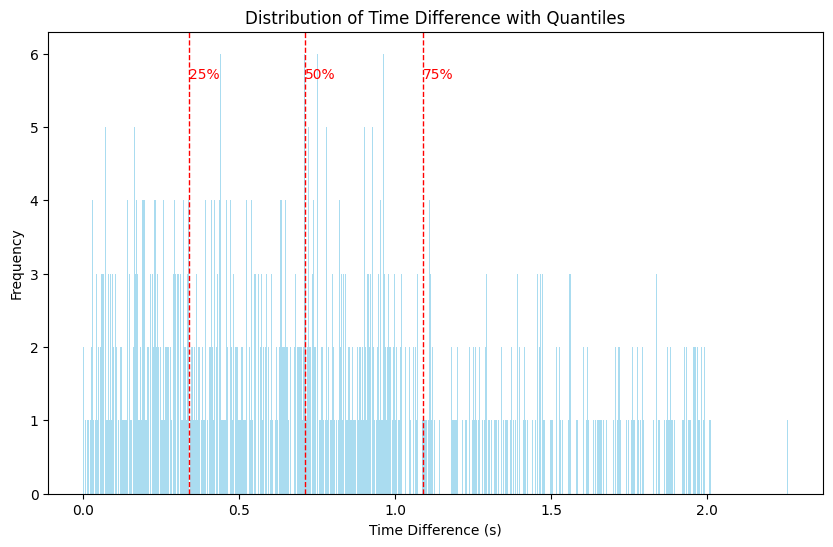

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# 计算分位数
quantiles = df['与这一批WIFI数据的时间差(s)'].quantile([0.25, 0.5, 0.75])
# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(df['与这一批WIFI数据的时间差(s)'], bins=700, color='skyblue', alpha=0.7) #,edgecolor='black'
# 添加分位数标记
for quantile in quantiles.index:
    value = quantiles[quantile]
    plt.axvline(value, color='red', linestyle='dashed', linewidth=1)
    plt.text(value, plt.ylim()[1]*0.9, f'{quantile*100:.0f}%', color='red')
# 添加图例和标题
plt.title('Distribution of Time Difference with Quantiles')
plt.xlabel('Time Difference (s)')
plt.ylabel('Frequency')
plt.show()

In [9]:
df=df1
# print(df.columns)
df=df.drop(['来源文件地址', 'POSI的Timestamp(s)', 'POSI的Counter', 'Building ID', '与这一批WIFI数据的时间差(s)',
            '最近一批WIFI数据的AppTimestamp(s)', '最近一批WIFI数据的SensorTimeStamp(s)'],axis=1)
print(df.columns)
df1=df1.drop(['来源文件地址', 'POSI的Timestamp(s)', 'POSI的Counter', 'Building ID', '与这一批WIFI数据的时间差(s)',
            '最近一批WIFI数据的AppTimestamp(s)', '最近一批WIFI数据的SensorTimeStamp(s)'],axis=1)
df2=df2.drop(['来源文件地址', 'POSI的Timestamp(s)', 'POSI的Counter', 'Building ID', '与这一批WIFI数据的时间差(s)',
            '最近一批WIFI数据的AppTimestamp(s)', '最近一批WIFI数据的SensorTimeStamp(s)'],axis=1)

Index(['Latitude', 'Longitude', 'floor ID', '20:23:00:00:00:01',
       '20:23:00:00:00:02', '20:23:00:00:00:03', '20:23:00:00:00:04',
       '20:23:00:00:00:05', '20:23:00:00:00:06', '20:23:00:00:00:07',
       ...
       '20:23:00:00:03:39', '20:23:00:00:03:40', '20:23:00:00:03:41',
       '20:23:00:00:03:42', '20:23:00:00:03:43', '20:23:00:00:03:44',
       '20:23:00:00:03:45', '20:23:00:00:03:46', '20:23:00:00:03:47',
       '20:23:00:00:03:48'],
      dtype='object', length=240)


In [12]:
# 数据预处理
from sklearn.preprocessing import StandardScaler

# X = df[["20:23:00:00:00:01", "20:23:00:00:00:02", "20:23:00:00:00:03", "20:23:00:00:00:04", "20:23:00:00:00:05", "20:23:00:00:00:06", "20:23:00:00:00:07", "20:23:00:00:00:08", "20:23:00:00:00:09", "20:23:00:00:00:10", "20:23:00:00:00:11", "20:23:00:00:00:12", "20:23:00:00:00:13", "20:23:00:00:00:14", "20:23:00:00:00:15", "20:23:00:00:00:16", "20:23:00:00:00:17", "20:23:00:00:00:18", "20:23:00:00:00:19", "20:23:00:00:00:21", "20:23:00:00:00:22", "20:23:00:00:00:23", "20:23:00:00:00:24", "20:23:00:00:00:25", "20:23:00:00:00:26", "20:23:00:00:00:27", "20:23:00:00:00:28", "20:23:00:00:00:30", "20:23:00:00:00:31", "20:23:00:00:00:34", "20:23:00:00:00:35", "20:23:00:00:00:36", "20:23:00:00:00:37", "20:23:00:00:00:38", "20:23:00:00:00:41", "20:23:00:00:00:42", "20:23:00:00:00:44", "20:23:00:00:00:45", "20:23:00:00:00:46", "20:23:00:00:00:47", "20:23:00:00:00:48", "20:23:00:00:00:49", "20:23:00:00:00:50", "20:23:00:00:00:51", "20:23:00:00:00:52", "20:23:00:00:00:55", "20:23:00:00:00:56", "20:23:00:00:00:57", "20:23:00:00:00:59", "20:23:00:00:00:61", "20:23:00:00:00:62", "20:23:00:00:00:65", "20:23:00:00:00:67", "20:23:00:00:00:68", "20:23:00:00:00:69", "20:23:00:00:00:71", "20:23:00:00:00:72", "20:23:00:00:00:73", "20:23:00:00:00:79", "20:23:00:00:00:80", "20:23:00:00:00:82", "20:23:00:00:00:84", "20:23:00:00:00:88", "20:23:00:00:00:89", "20:23:00:00:00:90", "20:23:00:00:00:91", "20:23:00:00:00:92", "20:23:00:00:00:93", "20:23:00:00:00:94", "20:23:00:00:00:95", "20:23:00:00:00:96", "20:23:00:00:00:97", "20:23:00:00:00:98", "20:23:00:00:00:99", "20:23:00:00:01:00", "20:23:00:00:01:01", "20:23:00:00:01:02", "20:23:00:00:01:03", "20:23:00:00:01:04", "20:23:00:00:01:05", "20:23:00:00:01:06", "20:23:00:00:01:07", "20:23:00:00:01:08", "20:23:00:00:01:09", "20:23:00:00:01:10", "20:23:00:00:01:11", "20:23:00:00:01:12", "20:23:00:00:01:13", "20:23:00:00:01:14", "20:23:00:00:01:15", "20:23:00:00:01:16", "20:23:00:00:01:17", "20:23:00:00:01:18", "20:23:00:00:01:19", "20:23:00:00:01:20", "20:23:00:00:01:21", "20:23:00:00:01:22", "20:23:00:00:01:23", "20:23:00:00:01:24", "20:23:00:00:01:26", "20:23:00:00:01:27", "20:23:00:00:01:28", "20:23:00:00:01:29", "20:23:00:00:01:31", "20:23:00:00:01:32", "20:23:00:00:01:33", "20:23:00:00:01:34", "20:23:00:00:01:35", "20:23:00:00:01:36", "20:23:00:00:01:37", "20:23:00:00:01:38", "20:23:00:00:01:39", "20:23:00:00:01:40", "20:23:00:00:01:41", "20:23:00:00:01:42", "20:23:00:00:01:43", "20:23:00:00:01:44", "20:23:00:00:01:45", "20:23:00:00:01:46", "20:23:00:00:01:47", "20:23:00:00:01:51", "20:23:00:00:01:52", "20:23:00:00:01:54", "20:23:00:00:01:55", "20:23:00:00:01:56", "20:23:00:00:01:58", "20:23:00:00:01:59", "20:23:00:00:01:60", "20:23:00:00:01:62", "20:23:00:00:01:64", "20:23:00:00:01:65", "20:23:00:00:01:66", "20:23:00:00:01:67", "20:23:00:00:01:68", "20:23:00:00:01:69", "20:23:00:00:01:70", "20:23:00:00:01:71", "20:23:00:00:01:72", "20:23:00:00:01:73", "20:23:00:00:01:74", "20:23:00:00:01:75", "20:23:00:00:01:76", "20:23:00:00:01:77", "20:23:00:00:01:81", "20:23:00:00:01:82", "20:23:00:00:01:83", "20:23:00:00:01:84", "20:23:00:00:01:85", "20:23:00:00:01:86", "20:23:00:00:01:87", "20:23:00:00:01:88", "20:23:00:00:01:89", "20:23:00:00:01:90", "20:23:00:00:01:91", "20:23:00:00:01:92", "20:23:00:00:01:93", "20:23:00:00:01:94", "20:23:00:00:01:95", "20:23:00:00:01:96", "20:23:00:00:01:97", "20:23:00:00:01:98", "20:23:00:00:02:01", "20:23:00:00:02:07", "20:23:00:00:02:09", "20:23:00:00:02:10", "20:23:00:00:02:11", "20:23:00:00:02:12", "20:23:00:00:02:14", "20:23:00:00:02:15", "20:23:00:00:02:16", "20:23:00:00:02:17", "20:23:00:00:02:18", "20:23:00:00:02:19", "20:23:00:00:02:20", "20:23:00:00:02:21", "20:23:00:00:02:22", "20:23:00:00:02:23", "20:23:00:00:02:24", "20:23:00:00:02:25", "20:23:00:00:02:26", "20:23:00:00:02:27", "20:23:00:00:02:28", "20:23:00:00:02:29", "20:23:00:00:02:30", "20:23:00:00:02:34", "20:23:00:00:02:35", "20:23:00:00:02:39", "20:23:00:00:02:54", "20:23:00:00:02:55", "20:23:00:00:02:56", "20:23:00:00:02:57", "20:23:00:00:02:58", "20:23:00:00:02:59", "20:23:00:00:02:60", "20:23:00:00:02:61", "20:23:00:00:02:65", "20:23:00:00:02:67", "20:23:00:00:02:70", "20:23:00:00:02:73", "20:23:00:00:02:74", "20:23:00:00:02:82", "20:23:00:00:02:88", "20:23:00:00:02:89", "20:23:00:00:03:08", "20:23:00:00:03:11", "20:23:00:00:03:12", "20:23:00:00:03:13", "20:23:00:00:03:15", "20:23:00:00:03:16", "20:23:00:00:03:17", "20:23:00:00:03:20", "20:23:00:00:03:21", "20:23:00:00:03:22", "20:23:00:00:03:25", "20:23:00:00:03:26", "20:23:00:00:03:27", "20:23:00:00:03:28", "20:23:00:00:03:29", "20:23:00:00:03:30", "20:23:00:00:03:31", "20:23:00:00:03:32", "20:23:00:00:03:33", "20:23:00:00:03:34", "20:23:00:00:03:35", "20:23:00:00:03:36", "20:23:00:00:03:37", "20:23:00:00:03:38", "20:23:00:00:03:39", "20:23:00:00:03:40", "20:23:00:00:03:41", "20:23:00:00:03:42", "20:23:00:00:03:43", "20:23:00:00:03:44", "20:23:00:00:03:45", "20:23:00:00:03:46", "20:23:00:00:03:47", "20:23:00:00:03:48"]].fillna(-100)
x = df1.drop(["Latitude", "Longitude", "floor ID"], axis=1, inplace=False)
y = df1[["Latitude", "Longitude", "floor ID"]]  # Targets
print(x.shape,y.shape,df1.shape)
X = df2.drop(["Latitude", "Longitude", "floor ID"], axis=1, inplace=False)
Y = df2[["Latitude", "Longitude", "floor ID"]]  # Targets
print(X.shape,Y.shape,df2.shape)

posi  =df1[["Latitude", "Longitude"]]#.round(7)
lat   =df1["Latitude"]
lon   =df1["Longitude"]
floor =df1["floor ID"]
print("\nposi.shape,floor.shape"'\n',posi.shape,floor.shape)
POSI  =df2[["Latitude", "Longitude"]]
LAT   =df2["Latitude"]
LON   =df2["Longitude"]
FLOOR =df2["floor ID"]
print("POSI.shape,floor.shape"'\n',POSI.shape,floor.shape)

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_scaled = scaler.fit_transform(X)
# print(posi)

(762, 237) (762, 3) (762, 240)
(112, 237) (112, 3) (112, 240)

posi.shape,floor.shape
 (762, 2) (762,)
POSI.shape,floor.shape
 (112, 2) (762,)


# 以下暂时全部作废

In [90]:
# 数据预处理
from sklearn.preprocessing import StandardScaler

# X = df[["20:23:00:00:00:01", "20:23:00:00:00:02", "20:23:00:00:00:03", "20:23:00:00:00:04", "20:23:00:00:00:05", "20:23:00:00:00:06", "20:23:00:00:00:07", "20:23:00:00:00:08", "20:23:00:00:00:09", "20:23:00:00:00:10", "20:23:00:00:00:11", "20:23:00:00:00:12", "20:23:00:00:00:13", "20:23:00:00:00:14", "20:23:00:00:00:15", "20:23:00:00:00:16", "20:23:00:00:00:17", "20:23:00:00:00:18", "20:23:00:00:00:19", "20:23:00:00:00:21", "20:23:00:00:00:22", "20:23:00:00:00:23", "20:23:00:00:00:24", "20:23:00:00:00:25", "20:23:00:00:00:26", "20:23:00:00:00:27", "20:23:00:00:00:28", "20:23:00:00:00:30", "20:23:00:00:00:31", "20:23:00:00:00:34", "20:23:00:00:00:35", "20:23:00:00:00:36", "20:23:00:00:00:37", "20:23:00:00:00:38", "20:23:00:00:00:41", "20:23:00:00:00:42", "20:23:00:00:00:44", "20:23:00:00:00:45", "20:23:00:00:00:46", "20:23:00:00:00:47", "20:23:00:00:00:48", "20:23:00:00:00:49", "20:23:00:00:00:50", "20:23:00:00:00:51", "20:23:00:00:00:52", "20:23:00:00:00:55", "20:23:00:00:00:56", "20:23:00:00:00:57", "20:23:00:00:00:59", "20:23:00:00:00:61", "20:23:00:00:00:62", "20:23:00:00:00:65", "20:23:00:00:00:67", "20:23:00:00:00:68", "20:23:00:00:00:69", "20:23:00:00:00:71", "20:23:00:00:00:72", "20:23:00:00:00:73", "20:23:00:00:00:79", "20:23:00:00:00:80", "20:23:00:00:00:82", "20:23:00:00:00:84", "20:23:00:00:00:88", "20:23:00:00:00:89", "20:23:00:00:00:90", "20:23:00:00:00:91", "20:23:00:00:00:92", "20:23:00:00:00:93", "20:23:00:00:00:94", "20:23:00:00:00:95", "20:23:00:00:00:96", "20:23:00:00:00:97", "20:23:00:00:00:98", "20:23:00:00:00:99", "20:23:00:00:01:00", "20:23:00:00:01:01", "20:23:00:00:01:02", "20:23:00:00:01:03", "20:23:00:00:01:04", "20:23:00:00:01:05", "20:23:00:00:01:06", "20:23:00:00:01:07", "20:23:00:00:01:08", "20:23:00:00:01:09", "20:23:00:00:01:10", "20:23:00:00:01:11", "20:23:00:00:01:12", "20:23:00:00:01:13", "20:23:00:00:01:14", "20:23:00:00:01:15", "20:23:00:00:01:16", "20:23:00:00:01:17", "20:23:00:00:01:18", "20:23:00:00:01:19", "20:23:00:00:01:20", "20:23:00:00:01:21", "20:23:00:00:01:22", "20:23:00:00:01:23", "20:23:00:00:01:24", "20:23:00:00:01:26", "20:23:00:00:01:27", "20:23:00:00:01:28", "20:23:00:00:01:29", "20:23:00:00:01:31", "20:23:00:00:01:32", "20:23:00:00:01:33", "20:23:00:00:01:34", "20:23:00:00:01:35", "20:23:00:00:01:36", "20:23:00:00:01:37", "20:23:00:00:01:38", "20:23:00:00:01:39", "20:23:00:00:01:40", "20:23:00:00:01:41", "20:23:00:00:01:42", "20:23:00:00:01:43", "20:23:00:00:01:44", "20:23:00:00:01:45", "20:23:00:00:01:46", "20:23:00:00:01:47", "20:23:00:00:01:51", "20:23:00:00:01:52", "20:23:00:00:01:54", "20:23:00:00:01:55", "20:23:00:00:01:56", "20:23:00:00:01:58", "20:23:00:00:01:59", "20:23:00:00:01:60", "20:23:00:00:01:62", "20:23:00:00:01:64", "20:23:00:00:01:65", "20:23:00:00:01:66", "20:23:00:00:01:67", "20:23:00:00:01:68", "20:23:00:00:01:69", "20:23:00:00:01:70", "20:23:00:00:01:71", "20:23:00:00:01:72", "20:23:00:00:01:73", "20:23:00:00:01:74", "20:23:00:00:01:75", "20:23:00:00:01:76", "20:23:00:00:01:77", "20:23:00:00:01:81", "20:23:00:00:01:82", "20:23:00:00:01:83", "20:23:00:00:01:84", "20:23:00:00:01:85", "20:23:00:00:01:86", "20:23:00:00:01:87", "20:23:00:00:01:88", "20:23:00:00:01:89", "20:23:00:00:01:90", "20:23:00:00:01:91", "20:23:00:00:01:92", "20:23:00:00:01:93", "20:23:00:00:01:94", "20:23:00:00:01:95", "20:23:00:00:01:96", "20:23:00:00:01:97", "20:23:00:00:01:98", "20:23:00:00:02:01", "20:23:00:00:02:07", "20:23:00:00:02:09", "20:23:00:00:02:10", "20:23:00:00:02:11", "20:23:00:00:02:12", "20:23:00:00:02:14", "20:23:00:00:02:15", "20:23:00:00:02:16", "20:23:00:00:02:17", "20:23:00:00:02:18", "20:23:00:00:02:19", "20:23:00:00:02:20", "20:23:00:00:02:21", "20:23:00:00:02:22", "20:23:00:00:02:23", "20:23:00:00:02:24", "20:23:00:00:02:25", "20:23:00:00:02:26", "20:23:00:00:02:27", "20:23:00:00:02:28", "20:23:00:00:02:29", "20:23:00:00:02:30", "20:23:00:00:02:34", "20:23:00:00:02:35", "20:23:00:00:02:39", "20:23:00:00:02:54", "20:23:00:00:02:55", "20:23:00:00:02:56", "20:23:00:00:02:57", "20:23:00:00:02:58", "20:23:00:00:02:59", "20:23:00:00:02:60", "20:23:00:00:02:61", "20:23:00:00:02:65", "20:23:00:00:02:67", "20:23:00:00:02:70", "20:23:00:00:02:73", "20:23:00:00:02:74", "20:23:00:00:02:82", "20:23:00:00:02:88", "20:23:00:00:02:89", "20:23:00:00:03:08", "20:23:00:00:03:11", "20:23:00:00:03:12", "20:23:00:00:03:13", "20:23:00:00:03:15", "20:23:00:00:03:16", "20:23:00:00:03:17", "20:23:00:00:03:20", "20:23:00:00:03:21", "20:23:00:00:03:22", "20:23:00:00:03:25", "20:23:00:00:03:26", "20:23:00:00:03:27", "20:23:00:00:03:28", "20:23:00:00:03:29", "20:23:00:00:03:30", "20:23:00:00:03:31", "20:23:00:00:03:32", "20:23:00:00:03:33", "20:23:00:00:03:34", "20:23:00:00:03:35", "20:23:00:00:03:36", "20:23:00:00:03:37", "20:23:00:00:03:38", "20:23:00:00:03:39", "20:23:00:00:03:40", "20:23:00:00:03:41", "20:23:00:00:03:42", "20:23:00:00:03:43", "20:23:00:00:03:44", "20:23:00:00:03:45", "20:23:00:00:03:46", "20:23:00:00:03:47", "20:23:00:00:03:48"]].fillna(-100)
x = df1.drop(["Latitude", "Longitude", "floor ID"], axis=1, inplace=False)
y = df1[["Latitude", "Longitude", "floor ID"]]  # Targets
print(x.shape,y.shape,df1.shape)
X = df2.drop(["Latitude", "Longitude", "floor ID"], axis=1, inplace=False)
Y = df2[["Latitude", "Longitude", "floor ID"]]  # Targets
print(X.shape,Y.shape,df2.shape)

posi  =df1[["Latitude", "Longitude"]]#.round(7)
lat   =df1["Latitude"]
lon   =df1["Longitude"]
floor =df1["floor ID"]
print("\nposi.shape,floor.shape"'\n',posi.shape,floor.shape)
POSI  =df2[["Latitude", "Longitude"]]
LAT   =df2["Latitude"]
LON   =df2["Longitude"]
FLOOR =df2["floor ID"]
print("POSI.shape,floor.shape"'\n',POSI.shape,floor.shape)

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_scaled = scaler.fit_transform(X)
print(posi)

(762, 237) (762, 3) (762, 240)
(112, 237) (112, 3) (112, 240)

posi.shape,floor.shape
 (762, 2) (762,)
POSI.shape,floor.shape
 (112, 2) (762,)
      Latitude  Longitude
0    49.461222  11.111590
1    49.461219  11.111628
2    49.461323  11.111568
3    49.461294  11.111548
4    49.461294  11.111548
..         ...        ...
757  49.461043  11.111014
758  49.460959  11.110667
759  49.460948  11.110539
760  49.460933  11.110472
761  49.460900  11.110491

[762 rows x 2 columns]


In [ ]:
# 数据预处理
from sklearn.preprocessing import StandardScaler

# X = df[["20:23:00:00:00:01", "20:23:00:00:00:02", "20:23:00:00:00:03", "20:23:00:00:00:04", "20:23:00:00:00:05", "20:23:00:00:00:06", "20:23:00:00:00:07", "20:23:00:00:00:08", "20:23:00:00:00:09", "20:23:00:00:00:10", "20:23:00:00:00:11", "20:23:00:00:00:12", "20:23:00:00:00:13", "20:23:00:00:00:14", "20:23:00:00:00:15", "20:23:00:00:00:16", "20:23:00:00:00:17", "20:23:00:00:00:18", "20:23:00:00:00:19", "20:23:00:00:00:21", "20:23:00:00:00:22", "20:23:00:00:00:23", "20:23:00:00:00:24", "20:23:00:00:00:25", "20:23:00:00:00:26", "20:23:00:00:00:27", "20:23:00:00:00:28", "20:23:00:00:00:30", "20:23:00:00:00:31", "20:23:00:00:00:34", "20:23:00:00:00:35", "20:23:00:00:00:36", "20:23:00:00:00:37", "20:23:00:00:00:38", "20:23:00:00:00:41", "20:23:00:00:00:42", "20:23:00:00:00:44", "20:23:00:00:00:45", "20:23:00:00:00:46", "20:23:00:00:00:47", "20:23:00:00:00:48", "20:23:00:00:00:49", "20:23:00:00:00:50", "20:23:00:00:00:51", "20:23:00:00:00:52", "20:23:00:00:00:55", "20:23:00:00:00:56", "20:23:00:00:00:57", "20:23:00:00:00:59", "20:23:00:00:00:61", "20:23:00:00:00:62", "20:23:00:00:00:65", "20:23:00:00:00:67", "20:23:00:00:00:68", "20:23:00:00:00:69", "20:23:00:00:00:71", "20:23:00:00:00:72", "20:23:00:00:00:73", "20:23:00:00:00:79", "20:23:00:00:00:80", "20:23:00:00:00:82", "20:23:00:00:00:84", "20:23:00:00:00:88", "20:23:00:00:00:89", "20:23:00:00:00:90", "20:23:00:00:00:91", "20:23:00:00:00:92", "20:23:00:00:00:93", "20:23:00:00:00:94", "20:23:00:00:00:95", "20:23:00:00:00:96", "20:23:00:00:00:97", "20:23:00:00:00:98", "20:23:00:00:00:99", "20:23:00:00:01:00", "20:23:00:00:01:01", "20:23:00:00:01:02", "20:23:00:00:01:03", "20:23:00:00:01:04", "20:23:00:00:01:05", "20:23:00:00:01:06", "20:23:00:00:01:07", "20:23:00:00:01:08", "20:23:00:00:01:09", "20:23:00:00:01:10", "20:23:00:00:01:11", "20:23:00:00:01:12", "20:23:00:00:01:13", "20:23:00:00:01:14", "20:23:00:00:01:15", "20:23:00:00:01:16", "20:23:00:00:01:17", "20:23:00:00:01:18", "20:23:00:00:01:19", "20:23:00:00:01:20", "20:23:00:00:01:21", "20:23:00:00:01:22", "20:23:00:00:01:23", "20:23:00:00:01:24", "20:23:00:00:01:26", "20:23:00:00:01:27", "20:23:00:00:01:28", "20:23:00:00:01:29", "20:23:00:00:01:31", "20:23:00:00:01:32", "20:23:00:00:01:33", "20:23:00:00:01:34", "20:23:00:00:01:35", "20:23:00:00:01:36", "20:23:00:00:01:37", "20:23:00:00:01:38", "20:23:00:00:01:39", "20:23:00:00:01:40", "20:23:00:00:01:41", "20:23:00:00:01:42", "20:23:00:00:01:43", "20:23:00:00:01:44", "20:23:00:00:01:45", "20:23:00:00:01:46", "20:23:00:00:01:47", "20:23:00:00:01:51", "20:23:00:00:01:52", "20:23:00:00:01:54", "20:23:00:00:01:55", "20:23:00:00:01:56", "20:23:00:00:01:58", "20:23:00:00:01:59", "20:23:00:00:01:60", "20:23:00:00:01:62", "20:23:00:00:01:64", "20:23:00:00:01:65", "20:23:00:00:01:66", "20:23:00:00:01:67", "20:23:00:00:01:68", "20:23:00:00:01:69", "20:23:00:00:01:70", "20:23:00:00:01:71", "20:23:00:00:01:72", "20:23:00:00:01:73", "20:23:00:00:01:74", "20:23:00:00:01:75", "20:23:00:00:01:76", "20:23:00:00:01:77", "20:23:00:00:01:81", "20:23:00:00:01:82", "20:23:00:00:01:83", "20:23:00:00:01:84", "20:23:00:00:01:85", "20:23:00:00:01:86", "20:23:00:00:01:87", "20:23:00:00:01:88", "20:23:00:00:01:89", "20:23:00:00:01:90", "20:23:00:00:01:91", "20:23:00:00:01:92", "20:23:00:00:01:93", "20:23:00:00:01:94", "20:23:00:00:01:95", "20:23:00:00:01:96", "20:23:00:00:01:97", "20:23:00:00:01:98", "20:23:00:00:02:01", "20:23:00:00:02:07", "20:23:00:00:02:09", "20:23:00:00:02:10", "20:23:00:00:02:11", "20:23:00:00:02:12", "20:23:00:00:02:14", "20:23:00:00:02:15", "20:23:00:00:02:16", "20:23:00:00:02:17", "20:23:00:00:02:18", "20:23:00:00:02:19", "20:23:00:00:02:20", "20:23:00:00:02:21", "20:23:00:00:02:22", "20:23:00:00:02:23", "20:23:00:00:02:24", "20:23:00:00:02:25", "20:23:00:00:02:26", "20:23:00:00:02:27", "20:23:00:00:02:28", "20:23:00:00:02:29", "20:23:00:00:02:30", "20:23:00:00:02:34", "20:23:00:00:02:35", "20:23:00:00:02:39", "20:23:00:00:02:54", "20:23:00:00:02:55", "20:23:00:00:02:56", "20:23:00:00:02:57", "20:23:00:00:02:58", "20:23:00:00:02:59", "20:23:00:00:02:60", "20:23:00:00:02:61", "20:23:00:00:02:65", "20:23:00:00:02:67", "20:23:00:00:02:70", "20:23:00:00:02:73", "20:23:00:00:02:74", "20:23:00:00:02:82", "20:23:00:00:02:88", "20:23:00:00:02:89", "20:23:00:00:03:08", "20:23:00:00:03:11", "20:23:00:00:03:12", "20:23:00:00:03:13", "20:23:00:00:03:15", "20:23:00:00:03:16", "20:23:00:00:03:17", "20:23:00:00:03:20", "20:23:00:00:03:21", "20:23:00:00:03:22", "20:23:00:00:03:25", "20:23:00:00:03:26", "20:23:00:00:03:27", "20:23:00:00:03:28", "20:23:00:00:03:29", "20:23:00:00:03:30", "20:23:00:00:03:31", "20:23:00:00:03:32", "20:23:00:00:03:33", "20:23:00:00:03:34", "20:23:00:00:03:35", "20:23:00:00:03:36", "20:23:00:00:03:37", "20:23:00:00:03:38", "20:23:00:00:03:39", "20:23:00:00:03:40", "20:23:00:00:03:41", "20:23:00:00:03:42", "20:23:00:00:03:43", "20:23:00:00:03:44", "20:23:00:00:03:45", "20:23:00:00:03:46", "20:23:00:00:03:47", "20:23:00:00:03:48"]].fillna(-100)
x = df1.drop(["Latitude", "Longitude", "floor ID"], axis=1, inplace=False)
y = df1[["Latitude", "Longitude", "floor ID"]]  # Targets
print(x.shape,y.shape,df1.shape)
X = df2.drop(["Latitude", "Longitude", "floor ID"], axis=1, inplace=False)
Y = df2[["Latitude", "Longitude", "floor ID"]]  # Targets
print(X.shape,Y.shape,df2.shape)

posi  =df1[["Latitude", "Longitude"]]#.round(7)
lat   =df1["Latitude"]
lon   =df1["Longitude"]
floor =df1["floor ID"]
print("\nposi.shape,floor.shape"'\n',posi.shape,floor.shape)
POSI  =df2[["Latitude", "Longitude"]]
LAT   =df2["Latitude"]
LON   =df2["Longitude"]
FLOOR =df2["floor ID"]
print("POSI.shape,floor.shape"'\n',POSI.shape,floor.shape)

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_scaled = scaler.fit_transform(X)
print(posi)

In [13]:
# 测试我原来的代码
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib


X_train, X_test, y_train, y_test = train_test_split(x, lat, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#随机森林
rf_model_lat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lat.fit(X_train_scaled, y_train)
rf_predictions = rf_model_lat.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("mse of lat:",rf_mse)

X_train, X_test, y_train, y_test = train_test_split(x, lon, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#随机森林
rf_model_lon = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lon.fit(X_train_scaled, y_train)
rf_predictions = rf_model_lon.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("mse of lon:",rf_mse)





# test
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

predictions_lat = rf_model_lat.predict(X_scaled)
predictions_lon = rf_model_lon.predict(X_scaled)

predicted_df_lat = pd.DataFrame(predictions_lat, columns=["预测纬度"])
predicted_df_lon = pd.DataFrame(predictions_lon, columns=["预测经度"])


def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 6371 * c * 1000  # Convert km to meters

distance_errors = haversine_distance(POSI["Latitude"], POSI["Longitude"],
                                     predicted_df_lat["预测纬度"], predicted_df_lon["预测经度"])
print(np.mean(distance_errors))

mse of lat: 7.772256439865079e-10
mse of lon: 6.668820369412816e-09
6.557564095297459


In [92]:
# 测试我原来的代码
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib


# X_train, X_test, y_train, y_test = train_test_split(x, lat, test_size=0.2, random_state=42)
# Normalizing the data using StandardScaler
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#随机森林
rf_model_lat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lat.fit(x, lat)
rf_predictions = rf_model_lat.predict(X)
rf_mse = mean_squared_error(LAT, rf_predictions)
print("mse of lat:",rf_mse)

# X_train, X_test, y_train, y_test = train_test_split(x, lon, test_size=0.2, random_state=42)
# # Normalizing the data using StandardScaler
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#随机森林
rf_model_lon = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lon.fit(x, lon)
rf_predictions = rf_model_lon.predict(X)
rf_mse = mean_squared_error(LON, rf_predictions)
print("mse of lon:",rf_mse)





# test
# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)

predictions_lat = rf_model_lat.predict(X)
predictions_lon = rf_model_lon.predict(X    )

predicted_df_lat = pd.DataFrame(predictions_lat, columns=["预测纬度"])
predicted_df_lon = pd.DataFrame(predictions_lon, columns=["预测经度"])


def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 6371 * c * 1000  # Convert km to meters

distance_errors = haversine_distance(POSI["Latitude"], POSI["Longitude"],
                                     predicted_df_lat["预测纬度"], predicted_df_lon["预测经度"])
print(np.mean(distance_errors))

mse of lat: 3.186977238627543e-08
mse of lon: 3.069448602541742e-07
39.088264082459894


In [95]:

fingerprint_db = df3
fingerprint_db_test = df4

def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r * 1000  # Convert to meters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into features and labels
X_train = fingerprint_db.drop(columns=['Latitude', 'Longitude', 'floor ID'])
y_train_latitude = fingerprint_db['Latitude']
y_train_longitude = fingerprint_db['Longitude']
y_train_floor = fingerprint_db['floor ID']

# Train a Random Forest model for Latitude
rf_latitude = RandomForestRegressor(n_estimators=100)
rf_latitude.fit(X_train, y_train_latitude)

# Train a Random Forest model for Longitude
rf_longitude = RandomForestRegressor(n_estimators=100)
rf_longitude.fit(X_train, y_train_longitude)

# Since floor is categorical, we'll treat it as a classification problem
from sklearn.ensemble import RandomForestClassifier
rf_floor = RandomForestClassifier(n_estimators=100)
rf_floor.fit(X_train, y_train_floor)

# Evaluate on the test data
X_test = fingerprint_db_test.drop(columns=['Latitude', 'Longitude', 'floor ID'])
y_test_latitude = fingerprint_db_test['Latitude']
y_test_longitude = fingerprint_db_test['Longitude']
y_test_floor = fingerprint_db_test['floor ID']

latitude_pred = rf_latitude.predict(X_test)
longitude_pred = rf_longitude.predict(X_test)
floor_pred = rf_floor.predict(X_test)

# Calculate the RMSE for latitude and longitude
rmse_latitude = mean_squared_error(y_test_latitude, latitude_pred, squared=False)
rmse_longitude = mean_squared_error(y_test_longitude, longitude_pred, squared=False)

print("rmse_latitude:",rmse_latitude,"rmse_longitude:",rmse_longitude)

# from joblib import dump, load
# # Save the model
# dump(rf_latitude, './model/rf_latitude_model.joblib')
# dump(rf_longitude, './model/rf_longitude_model.joblib')
# dump(rf_floor, './model/rf_floor_model.joblib')
# print("models are saved successfully!")

# 保存test data的计算误差
# Create a DataFrame for the predicted values
predicted_df = pd.DataFrame({
    'Predicted_Latitude': latitude_pred,
    'Predicted_Longitude': longitude_pred,
    'Predicted_Floor': floor_pred
})
# Concatenate the original test data and the predicted values
result_df = pd.concat([fingerprint_db_test, predicted_df], axis=1)
# Calculate the distance in meters between the actual and predicted coordinates
result_df['Distance_Error_m'] = haversine(result_df['Latitude'], result_df['Longitude'],
                                         result_df['Predicted_Latitude'], result_df['Predicted_Longitude'])
# Calculate the floor error
result_df['Floor_Error'] = result_df['floor ID'] - result_df['Predicted_Floor']
# print(result_df.head(5))
# result_df.to_csv('/home/chaoyi/ipin/913rf/test_data/predict_results.csv', index=False)
print(result_df.columns)
print(result_df['Distance_Error_m'].mean())
print("the predic results are saved successfully!")

rmse_latitude: 5.234917645615666e-05 rmse_longitude: 7.225868178131409e-05
Index(['Latitude', 'Longitude', 'floor ID', '20:23:00:00:00:01',
       '20:23:00:00:00:02', '20:23:00:00:00:03', '20:23:00:00:00:04',
       '20:23:00:00:00:05', '20:23:00:00:00:06', '20:23:00:00:00:07',
       ...
       '20:23:00:00:03:44', '20:23:00:00:03:45', '20:23:00:00:03:46',
       '20:23:00:00:03:47', '20:23:00:00:03:48', 'Predicted_Latitude',
       'Predicted_Longitude', 'Predicted_Floor', 'Distance_Error_m',
       'Floor_Error'],
      dtype='object', length=245)
5.635608026314104
the predic results are saved successfully!


In [87]:
# 试试我windows里已经work的代码

import pandas as pd
import numpy as np

###仅用train的指纹库训练
# fingerprint_data = pd.read_csv('/home/chaoyi/ipin/921rf/912data/fingerprint_database.csv')

####合并train和test的指纹库
# fingerprint_data = pd.read_csv('/home/chaoyi/ipin/921rf/912data/fingerprint_database.csv')
# fingerprint_data_test = pd.read_csv('/home/chaoyi/ipin/921rf/912data/fingerprint_database_test.csv')
# fingerprint_data = pd.concat([fingerprint_data, fingerprint_data_test], ignore_index=True)

# Load the provided fingerprint database
# E:\ipin\2023\ipin913\913rf\912data
# fingerprint_db = pd.read_csv('E:/ipin/2023/ipin913/913rf/912data/fingerprint_database.csv')
# fingerprint_db_test = pd.read_csv('E:/ipin/2023/ipin913/913rf/912data/fingerprint_database_test.csv')

fingerprint_db = df1
fingerprint_db_test = df2

# # Display the first few rows of the database
# fingerprint_db.head()

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r * 1000  # Convert to meters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into features and labels
X_train = fingerprint_db.drop(columns=['Latitude', 'Longitude', 'floor ID'])
y_train_latitude = fingerprint_db['Latitude']
y_train_longitude = fingerprint_db['Longitude']
y_train_floor = fingerprint_db['floor ID']

# Train a Random Forest model for Latitude
rf_latitude = RandomForestRegressor(n_estimators=100)
rf_latitude.fit(X_train, y_train_latitude)

# Train a Random Forest model for Longitude
rf_longitude = RandomForestRegressor(n_estimators=100)
rf_longitude.fit(X_train, y_train_longitude)

# Since floor is categorical, we'll treat it as a classification problem
from sklearn.ensemble import RandomForestClassifier
rf_floor = RandomForestClassifier(n_estimators=100)
rf_floor.fit(X_train, y_train_floor)

# Evaluate on the test data
X_test = fingerprint_db_test.drop(columns=['Latitude', 'Longitude', 'floor ID'])
y_test_latitude = fingerprint_db_test['Latitude']
y_test_longitude = fingerprint_db_test['Longitude']
y_test_floor = fingerprint_db_test['floor ID']

latitude_pred = rf_latitude.predict(X_test)
longitude_pred = rf_longitude.predict(X_test)
floor_pred = rf_floor.predict(X_test)

# Calculate the RMSE for latitude and longitude
rmse_latitude = mean_squared_error(y_test_latitude, latitude_pred, squared=False)
rmse_longitude = mean_squared_error(y_test_longitude, longitude_pred, squared=False)

print("rmse_latitude:",rmse_latitude,"rmse_longitude:",rmse_longitude)

# from joblib import dump, load
# # Save the model
# dump(rf_latitude, './model/rf_latitude_model.joblib')
# dump(rf_longitude, './model/rf_longitude_model.joblib')
# dump(rf_floor, './model/rf_floor_model.joblib')
# print("models are saved successfully!")

# 保存test data的计算误差
# Create a DataFrame for the predicted values
predicted_df = pd.DataFrame({
    'Predicted_Latitude': latitude_pred,
    'Predicted_Longitude': longitude_pred,
    'Predicted_Floor': floor_pred
})
# Concatenate the original test data and the predicted values
result_df = pd.concat([fingerprint_db_test, predicted_df], axis=1)
# Calculate the distance in meters between the actual and predicted coordinates
result_df['Distance_Error_m'] = haversine(result_df['Latitude'], result_df['Longitude'],
                                         result_df['Predicted_Latitude'], result_df['Predicted_Longitude'])
# Calculate the floor error
result_df['Floor_Error'] = result_df['floor ID'] - result_df['Predicted_Floor']

# result_df.to_csv('/home/chaoyi/ipin/913rf/test_data/predict_results.csv', index=False)
print(result_df.columns)
print(result_df['Distance_Error_m'].mean())
print("the predic results are saved successfully!")

rmse_latitude: 0.00017909805067467573 rmse_longitude: 0.0005545534482743437
Index(['Latitude', 'Longitude', 'floor ID', '20:23:00:00:00:01',
       '20:23:00:00:00:02', '20:23:00:00:00:03', '20:23:00:00:00:04',
       '20:23:00:00:00:05', '20:23:00:00:00:06', '20:23:00:00:00:07',
       ...
       '20:23:00:00:03:44', '20:23:00:00:03:45', '20:23:00:00:03:46',
       '20:23:00:00:03:47', '20:23:00:00:03:48', 'Predicted_Latitude',
       'Predicted_Longitude', 'Predicted_Floor', 'Distance_Error_m',
       'Floor_Error'],
      dtype='object', length=245)
39.15761249426747
the predic results are saved successfully!


In [ ]:
# 测试我原来的代码

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib
# # Load the fingerprint database from the provided CSV file
# fingerprint_data = pd.read_csv('./output/fingerprint_database.csv', encoding='ISO-8859-1')
# #数据预处理
# X = fingerprint_data[["20:23:00:00:00:01", "20:23:00:00:00:02", "20:23:00:00:00:03", "20:23:00:00:00:04", "20:23:00:00:00:05", "20:23:00:00:00:06", "20:23:00:00:00:07", "20:23:00:00:00:08", "20:23:00:00:00:09", "20:23:00:00:00:10", "20:23:00:00:00:11", "20:23:00:00:00:12", "20:23:00:00:00:13", "20:23:00:00:00:14", "20:23:00:00:00:15", "20:23:00:00:00:16", "20:23:00:00:00:17", "20:23:00:00:00:18", "20:23:00:00:00:19", "20:23:00:00:00:21", "20:23:00:00:00:22", "20:23:00:00:00:23", "20:23:00:00:00:24", "20:23:00:00:00:25", "20:23:00:00:00:26", "20:23:00:00:00:27", "20:23:00:00:00:28", "20:23:00:00:00:30", "20:23:00:00:00:31", "20:23:00:00:00:34", "20:23:00:00:00:35", "20:23:00:00:00:36", "20:23:00:00:00:37", "20:23:00:00:00:38", "20:23:00:00:00:41", "20:23:00:00:00:42", "20:23:00:00:00:44", "20:23:00:00:00:45", "20:23:00:00:00:46", "20:23:00:00:00:47", "20:23:00:00:00:48", "20:23:00:00:00:49", "20:23:00:00:00:50", "20:23:00:00:00:51", "20:23:00:00:00:52", "20:23:00:00:00:55", "20:23:00:00:00:56", "20:23:00:00:00:57", "20:23:00:00:00:59", "20:23:00:00:00:61", "20:23:00:00:00:62", "20:23:00:00:00:65", "20:23:00:00:00:67", "20:23:00:00:00:68", "20:23:00:00:00:69", "20:23:00:00:00:71", "20:23:00:00:00:72", "20:23:00:00:00:73", "20:23:00:00:00:79", "20:23:00:00:00:80", "20:23:00:00:00:82", "20:23:00:00:00:84", "20:23:00:00:00:88", "20:23:00:00:00:89", "20:23:00:00:00:90", "20:23:00:00:00:91", "20:23:00:00:00:92", "20:23:00:00:00:93", "20:23:00:00:00:94", "20:23:00:00:00:95", "20:23:00:00:00:96", "20:23:00:00:00:97", "20:23:00:00:00:98", "20:23:00:00:00:99", "20:23:00:00:01:00", "20:23:00:00:01:01", "20:23:00:00:01:02", "20:23:00:00:01:03", "20:23:00:00:01:04", "20:23:00:00:01:05", "20:23:00:00:01:06", "20:23:00:00:01:07", "20:23:00:00:01:08", "20:23:00:00:01:09", "20:23:00:00:01:10", "20:23:00:00:01:11", "20:23:00:00:01:12", "20:23:00:00:01:13", "20:23:00:00:01:14", "20:23:00:00:01:15", "20:23:00:00:01:16", "20:23:00:00:01:17", "20:23:00:00:01:18", "20:23:00:00:01:19", "20:23:00:00:01:20", "20:23:00:00:01:21", "20:23:00:00:01:22", "20:23:00:00:01:23", "20:23:00:00:01:24", "20:23:00:00:01:26", "20:23:00:00:01:27", "20:23:00:00:01:28", "20:23:00:00:01:29", "20:23:00:00:01:31", "20:23:00:00:01:32", "20:23:00:00:01:33", "20:23:00:00:01:34", "20:23:00:00:01:35", "20:23:00:00:01:36", "20:23:00:00:01:37", "20:23:00:00:01:38", "20:23:00:00:01:39", "20:23:00:00:01:40", "20:23:00:00:01:41", "20:23:00:00:01:42", "20:23:00:00:01:43", "20:23:00:00:01:44", "20:23:00:00:01:45", "20:23:00:00:01:46", "20:23:00:00:01:47", "20:23:00:00:01:51", "20:23:00:00:01:52", "20:23:00:00:01:54", "20:23:00:00:01:55", "20:23:00:00:01:56", "20:23:00:00:01:58", "20:23:00:00:01:59", "20:23:00:00:01:60", "20:23:00:00:01:62", "20:23:00:00:01:64", "20:23:00:00:01:65", "20:23:00:00:01:66", "20:23:00:00:01:67", "20:23:00:00:01:68", "20:23:00:00:01:69", "20:23:00:00:01:70", "20:23:00:00:01:71", "20:23:00:00:01:72", "20:23:00:00:01:73", "20:23:00:00:01:74", "20:23:00:00:01:75", "20:23:00:00:01:76", "20:23:00:00:01:77", "20:23:00:00:01:81", "20:23:00:00:01:82", "20:23:00:00:01:83", "20:23:00:00:01:84", "20:23:00:00:01:85", "20:23:00:00:01:86", "20:23:00:00:01:87", "20:23:00:00:01:88", "20:23:00:00:01:89", "20:23:00:00:01:90", "20:23:00:00:01:91", "20:23:00:00:01:92", "20:23:00:00:01:93", "20:23:00:00:01:94", "20:23:00:00:01:95", "20:23:00:00:01:96", "20:23:00:00:01:97", "20:23:00:00:01:98", "20:23:00:00:02:01", "20:23:00:00:02:07", "20:23:00:00:02:09", "20:23:00:00:02:10", "20:23:00:00:02:11", "20:23:00:00:02:12", "20:23:00:00:02:14", "20:23:00:00:02:15", "20:23:00:00:02:16", "20:23:00:00:02:17", "20:23:00:00:02:18", "20:23:00:00:02:19", "20:23:00:00:02:20", "20:23:00:00:02:21", "20:23:00:00:02:22", "20:23:00:00:02:23", "20:23:00:00:02:24", "20:23:00:00:02:25", "20:23:00:00:02:26", "20:23:00:00:02:27", "20:23:00:00:02:28", "20:23:00:00:02:29", "20:23:00:00:02:30", "20:23:00:00:02:34", "20:23:00:00:02:35", "20:23:00:00:02:39", "20:23:00:00:02:54", "20:23:00:00:02:55", "20:23:00:00:02:56", "20:23:00:00:02:57", "20:23:00:00:02:58", "20:23:00:00:02:59", "20:23:00:00:02:60", "20:23:00:00:02:61", "20:23:00:00:02:65", "20:23:00:00:02:67", "20:23:00:00:02:70", "20:23:00:00:02:73", "20:23:00:00:02:74", "20:23:00:00:02:82", "20:23:00:00:02:88", "20:23:00:00:02:89", "20:23:00:00:03:08", "20:23:00:00:03:11", "20:23:00:00:03:12", "20:23:00:00:03:13", "20:23:00:00:03:15", "20:23:00:00:03:16", "20:23:00:00:03:17", "20:23:00:00:03:20", "20:23:00:00:03:21", "20:23:00:00:03:22", "20:23:00:00:03:25", "20:23:00:00:03:26", "20:23:00:00:03:27", "20:23:00:00:03:28", "20:23:00:00:03:29", "20:23:00:00:03:30", "20:23:00:00:03:31", "20:23:00:00:03:32", "20:23:00:00:03:33", "20:23:00:00:03:34", "20:23:00:00:03:35", "20:23:00:00:03:36", "20:23:00:00:03:37", "20:23:00:00:03:38", "20:23:00:00:03:39", "20:23:00:00:03:40", "20:23:00:00:03:41", "20:23:00:00:03:42", "20:23:00:00:03:43", "20:23:00:00:03:44", "20:23:00:00:03:45", "20:23:00:00:03:46", "20:23:00:00:03:47", "20:23:00:00:03:48"]].fillna(-100)
# y = fingerprint_data[["Latitude(degrees)", "Longitude(degrees)", "floor ID"]]  # Targets

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, posi, test_size=0.2, random_state=42)

# Normalizing the data using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

################################################################
#随机森林

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the performance using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(rf_mse)


################################################################
#保存模型    rf_model




# test_data = pd.read_csv("./output/fingerprint_database_for_test.csv", encoding='ISO-8859-1')


# # 2. Pre-process the data

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 3. Make predictions
predictions = rf_model.predict(X_scaled)

predicted_df = pd.DataFrame(predictions, columns=["预测纬度", "预测经度"])

# 4. Calculate errors
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 6371 * c * 1000  # Convert km to meters

distance_errors = haversine_distance(POSI["Latitude"], POSI["Longitude"],
                                     predicted_df["预测纬度"], predicted_df["预测经度"])
print(np.mean(distance_errors))
# floor_errors = np.abs(test_data["floor ID"] - predicted_df["预测楼层"])

# # 5. Add predictions and errors to the dataframe
# test_data["预测纬度"] = predicted_df["预测纬度"]
# test_data["预测经度"] = predicted_df["预测经度"]
# test_data["预测楼层"] = predicted_df["预测楼层"]
# test_data["经纬度误差"] = distance_errors
# test_data["楼层误差"] = floor_errors

# # 6. Save the updated test data to a new CSV file
# test_data.to_csv(save_file, index=False)

我已经准备好了训练集和测试集，x，y，posi，lat，lon，floor是训练集的数据，用来训练模型，训练好后的模型输入X，预测出Y_predict，然后计算Y_predict和Y的距离（用哈夫塞公式，单位为米），并计算所有预测误差的平均值

In [70]:
# 导入所需的库
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 模型列表（仅支持多输出的模型）
models_multi_output = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

# 初始化评估结果
geo_metrics_multi_output = {}

# 训练并评估模型
for name, model in models_multi_output.items():
    model.fit(x_scaled, posi)  # 使用整个训练集进行训练
    Y_predict = model.predict(X_scaled)  # 使用测试集进行预测
    rmse = mean_squared_error(POSI, Y_predict, squared=False)  # 计算测试集的RMSE
    geo_metrics_multi_output[name] = {'RMSE': rmse}

# 输出评估结果
print("Metrics for Geolocation (Multi-Output):")
for name, metrics in geo_metrics_multi_output.items():
    print(f"{name}: {metrics}")

print("=================================")

def mean_haversine_distance(y_true_df, y_pred_array):
    # 从DataFrame中提取纬度和经度
    y_true_lat = y_true_df['Latitude']
    y_true_lon = y_true_df['Longitude']
    # 从numpy数组中提取预测的纬度和经度
    y_pred_lat = y_pred_array[:, 0]
    y_pred_lon = y_pred_array[:, 1]
    distances = haversine_distance(y_true_lat, y_true_lon, y_pred_lat, y_pred_lon)
    return np.mean(distances)

for name, metrics in geo_metrics_multi_output.items():
    Y_predict = models_multi_output[name].predict(X_scaled)
    mean_distance = mean_haversine_distance(POSI, Y_predict)
    print(f"Average prediction error for {name} (multi-output): {mean_distance:.2f} meters")


Metrics for Geolocation (Multi-Output):
K-Nearest Neighbors: {'RMSE': 0.00035648837161059133}
Random Forest: {'RMSE': 0.0003553599553306687}
Average prediction error for K-Nearest Neighbors (multi-output): 38.03 meters
Average prediction error for Random Forest (multi-output): 37.96 meters


In [51]:
# 模型列表（包括所有模型）
models_independent = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 初始化评估结果
geo_metrics_independent = {}
predicted_latitudes = {}
predicted_longitudes = {}

# 分别对经度和纬度进行预测
for dim, y_train_dim, y_test_dim in zip(['Latitude', 'Longitude'], [lat, lon], [LAT, LON]):
    print(f"Predicting {dim}")

    for name, model in models_independent.items():
        model.fit(x, y_train_dim)
        y_pred = model.predict(X)
        rmse = mean_squared_error(y_test_dim, y_pred, squared=False)

        if dim not in geo_metrics_independent:
            geo_metrics_independent[dim] = {}
        geo_metrics_independent[dim][name] = {'RMSE': rmse}

        if dim == 'Latitude':
            predicted_latitudes[name] = y_pred
        else:
            predicted_longitudes[name] = y_pred

# 输出评估结果
print("\nMetrics for Geolocation (Independent):")
for dim, metrics in geo_metrics_independent.items():
    print(f"\nFor {dim}:")
    for name, metric in metrics.items():
        print(f"{name}: {metric}")

print("=================================")

def mean_haversine_distance(y_true_lat, y_true_lon, y_pred_lat, y_pred_lon):
    distances = haversine_distance(y_true_lat, y_true_lon, y_pred_lat, y_pred_lon)
    return np.mean(distances)

print("\nAverage Prediction Errors in Meters:")
for dim, metrics in geo_metrics_independent.items():
    for name, metric in metrics.items():
        y_pred_lat = predicted_latitudes[name]
        y_pred_lon = predicted_longitudes[name]
        mean_distance = mean_haversine_distance(LAT, LON, y_pred_lat, y_pred_lon)
        print(f"Average prediction error for {name} (independent, {dim}): {mean_distance:.2f} meters")


Predicting Latitude
Predicting Longitude

Metrics for Geolocation (Independent):

For Latitude:
K-Nearest Neighbors: {'RMSE': 0.00017846690485661857}
Linear Regression: {'RMSE': 0.0001753448258409059}
Decision Tree: {'RMSE': 0.00018140723449036877}
Random Forest: {'RMSE': 0.00017852106986648785}
Support Vector Regression: {'RMSE': 0.00012619969146976246}
Gradient Boosting: {'RMSE': 0.0001741212115528629}

For Longitude:
K-Nearest Neighbors: {'RMSE': 0.0005508567217272051}
Linear Regression: {'RMSE': 0.0005456600463592644}
Decision Tree: {'RMSE': 0.0005657492735250198}
Random Forest: {'RMSE': 0.0005540260465485122}
Support Vector Regression: {'RMSE': 0.00037979814343717656}
Gradient Boosting: {'RMSE': 0.0005455471918182313}

Average Prediction Errors in Meters:
Average prediction error for K-Nearest Neighbors (independent, Latitude): 38.86 meters
Average prediction error for Linear Regression (independent, Latitude): 38.17 meters
Average prediction error for Decision Tree (independent, 

## 以下都是不对的老方法

In [8]:
# 经纬度预测
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

x_train, x_test, y_train, y_test = train_test_split(x, position, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
geo_metrics = {'RMSE': mean_squared_error(y_test, y_pred, squared=False)}
print("Metrics for Geolocation:", geo_metrics)

Metrics for Geolocation: {'RMSE': 4.973727285789599e-05}


In [22]:
# 经纬度预测,同时预测经纬度
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

# 模型列表（仅支持多输出的模型）
models_multi_output = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

# 分割数据
x_train, x_test, y_train, y_test = train_test_split(x, position, test_size=0.2, random_state=42)

# 初始化评估结果
geo_metrics_multi_output = {}

# 训练并评估模型
for name, model in models_multi_output.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    geo_metrics_multi_output[name] = {'RMSE': rmse}

# 输出评估结果
print("Metrics for Geolocation (Multi-Output):")
for name, metrics in geo_metrics_multi_output.items():
    print(f"{name}: {metrics}")
    

print("=================================")

def mean_haversine_distance(y_true, y_pred):
    distances = haversine_distance(y_true['Latitude'], y_true['Longitude'], y_pred[:, 0], y_pred[:, 1])
    return np.mean(distances)

for name, metrics in geo_metrics_multi_output.items():
    y_pred = models_multi_output[name].predict(x_test)
    mean_distance = mean_haversine_distance(y_test, y_pred)
    print(f"Average prediction error for {name} (multi-output): {mean_distance:.2f} meters")

Metrics for Geolocation (Multi-Output):
K-Nearest Neighbors: {'RMSE': 4.973727285789599e-05}
Random Forest: {'RMSE': 5.63650810743925e-05}
Average prediction error for K-Nearest Neighbors (multi-output): 4.71 meters
Average prediction error for Random Forest (multi-output): 5.35 meters


In [27]:
# 使用支持多输出的模型,分别预测经纬度
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  

# 模型列表（包括所有模型）
models_independent = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 初始化评估结果
geo_metrics_independent = {}

y_test_latitudes = {}
y_test_longitudes = {}

# 分别对经度和纬度进行预测
for dim, y_dim in zip(['Latitude', 'Longitude'], [lat, lon]):
    print(f"Predicting {dim}")
    
    # 分割数据
    x_train, x_test, y_train, y_test = train_test_split(x, y_dim, test_size=0.2, random_state=42)
    
    # for name, model in models_independent.items():
    #     model.fit(x_train, y_train)
    #     y_pred = model.predict(x_test)
    #     rmse = mean_squared_error(y_test, y_pred, squared=False)
        
    #     # 将结果存储到字典中
    #     if dim not in geo_metrics_independent:
    #         geo_metrics_independent[dim] = {}
    #     geo_metrics_independent[dim][name] = {'RMSE': rmse}
    
    if dim == 'Latitude':
        y_test_latitudes = y_test
    else:
        y_test_longitudes = y_test
    
    for name, model in models_independent.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        
        if dim not in geo_metrics_independent:
            geo_metrics_independent[dim] = {}
        geo_metrics_independent[dim][name] = {'RMSE': rmse}

# 输出评估结果
print("\nMetrics for Geolocation (Independent):")
for dim, metrics in geo_metrics_independent.items():
    print(f"\nFor {dim}:")
    for name, metric in metrics.items():
        print(f"{name}: {metric}")

print("=================================")

# 结果转化成米
# def mean_haversine_distance(y_true, y_pred):
#     distances = haversine_distance(y_true['Latitude'], y_true['Longitude'], y_pred[:, 0], y_pred[:, 1])
#     return np.mean(distances)
def mean_haversine_distance(y_true_lat, y_true_lon, y_pred_lat, y_pred_lon):
    distances = haversine_distance(y_true_lat, y_true_lon, y_pred_lat, y_pred_lon)
    return np.mean(distances)

# for dim, metrics in geo_metrics_independent.items():
#     for name, metric in metrics.items():
#         y_pred = models_independent[name].predict(x_test)
#         mean_distance = mean_haversine_distance(y_test_latitudes, y_test_longitudes, y_pred, y_pred)  # Duplicate predictions for latitude and longitude; replace as needed
#         print(f"Average prediction error for {name} (independent, {dim}): {mean_distance:.2f} meters")

print("\nAverage Prediction Errors in Meters:")
for dim, metrics in geo_metrics_independent.items():
    for name, metric in metrics.items():
        y_pred = models_independent[name].predict(x_test)
        mean_distance = mean_haversine_distance(y_test_latitudes, y_test_longitudes, y_pred, y_pred)  # Duplicate predictions for latitude and longitude; replace as needed
        print(f"Average prediction error for {name} (independent, {dim}): {mean_distance:.2f} meters")

Predicting Latitude
Predicting Longitude

Metrics for Geolocation (Independent):

For Latitude:
K-Nearest Neighbors: {'RMSE': 2.4947509806931503e-05}
Linear Regression: {'RMSE': 0.00010148197935940243}
Decision Tree: {'RMSE': 5.2878807781690595e-05}
Random Forest: {'RMSE': 2.767524747982964e-05}
Support Vector Regression: {'RMSE': 0.00012324214920990555}
Gradient Boosting: {'RMSE': 3.267710240522635e-05}

For Longitude:
K-Nearest Neighbors: {'RMSE': 7.452703590886049e-05}
Linear Regression: {'RMSE': 0.000202243419979306}
Decision Tree: {'RMSE': 0.0001698128070719058}
Random Forest: {'RMSE': 8.18798404325962e-05}
Support Vector Regression: {'RMSE': 0.0003628978879167636}
Gradient Boosting: {'RMSE': 8.861237474902184e-05}

Average Prediction Errors in Meters:
Average prediction error for K-Nearest Neighbors (independent, Latitude): 4264335.65 meters
Average prediction error for Linear Regression (independent, Latitude): 4264335.30 meters
Average prediction error for Decision Tree (indepe

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# 模拟数据和标签（仅用于测试）
# 请使用您实际的数据和标签替换这些
x = np.random.rand(100, 2)
lat = np.random.rand(100)
lon = np.random.rand(100)

# Haversine距离函数
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c * 1000
    return distance

# 模型列表
models_independent = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 初始化
geo_metrics_independent = {}
predicted_latitudes = {}
predicted_longitudes = {}
y_test_latitude = None
y_test_longitude = None

# 预测经度和纬度
for dim, y_dim in zip(['Latitude', 'Longitude'], [lat, lon]):
    print(f"Predicting {dim}")
    x_train, x_test, y_train, y_test = train_test_split(x, y_dim, test_size=0.2, random_state=42)
    
    if dim == 'Latitude':
        y_test_latitude = y_test
    else:
        y_test_longitude = y_test
    
    for name, model in models_independent.items():
        model = model.__class__(**model.get_params())  # Reset the model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if dim not in geo_metrics_independent:
            geo_metrics_independent[dim] = {}
        geo_metrics_independent[dim][name] = {'RMSE': rmse}
        
        if dim == 'Latitude':
            predicted_latitudes[name] = y_pred
        else:
            predicted_longitudes[name] = y_pred

# 输出结果
print("\nMetrics for Geolocation (Independent):")
for dim, metrics in geo_metrics_independent.items():
    print(f"For {dim}:")
    for name, metric in metrics.items():
        print(f"{name}: {metric}")

print("==========")
# 计算平均距离误差
print("\nAverage Prediction Errors in Meters:")
for name in models_independent.keys():
    print((y_test_latitude, y_test_longitude, predicted_latitudes[name], predicted_longitudes[name]))
    mean_distance = haversine_distance(y_test_latitude, y_test_longitude, predicted_latitudes[name], predicted_longitudes[name])
    mean_distance = np.mean(mean_distance)
    print(f"Average prediction error for {name}: {mean_distance:.2f} meters")


Predicting Latitude
Predicting Longitude

Metrics for Geolocation (Independent):
For Latitude:
K-Nearest Neighbors: {'RMSE': 0.3700113807928149}
Linear Regression: {'RMSE': 0.3436007017959892}
Decision Tree: {'RMSE': 0.5502848470123425}
Random Forest: {'RMSE': 0.4426735608369386}
Support Vector Regression: {'RMSE': 0.39847257390345603}
Gradient Boosting: {'RMSE': 0.4537200103360994}
For Longitude:
K-Nearest Neighbors: {'RMSE': 0.3540163702703748}
Linear Regression: {'RMSE': 0.31587590918573943}
Decision Tree: {'RMSE': 0.4915960557579641}
Random Forest: {'RMSE': 0.3822839521729705}
Support Vector Regression: {'RMSE': 0.3373874629518009}
Gradient Boosting: {'RMSE': 0.398307329840121}

Average Prediction Errors in Meters:
(array([0.81194357, 0.71387746, 0.09173571, 0.174805  , 0.31784161,
       0.17305814, 0.01342738, 0.94153062, 0.97161962, 0.68065874,
       0.69624252, 0.69074778, 0.28008646, 0.21367996, 0.42918212,
       0.94879534, 0.04592593, 0.53453309, 0.16856958, 0.92746632]), 

In [41]:
# 楼层分类
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, floor, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy for Floor Classification:", accuracy)
print("F1 Score for Floor Classification:", f1)


ValueError: Found input variables with inconsistent numbers of samples: [100, 762]

# 应该经纬度用回归,楼层用分类